In [147]:
import torch
from torch import nn
import numpy as np
import pandas as pd
import os
import kagglehub
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [148]:
path = kagglehub.dataset_download("rkiattisak/salaly-prediction-for-beginer")
print("Files:", os.listdir(path))
df = pd.read_csv(os.path.join(path,"Salary Data.csv"))
df.head()

Files: ['Salary Data.csv']


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [149]:
# remove rows / col containing missing values (NaN)
df = df.dropna()

X = df.drop(columns=["Salary"])
Y = df["Salary"]

# performs One-Hot Encoding
X_encoded = pd.get_dummies(X, columns=["Gender", "Education Level", "Job Title"])

input_size = X_encoded.shape[1]
# convert everything to float32
X_encoded = X_encoded.astype('float32')

x_tensor = torch.tensor(X_encoded.values,dtype=torch.float32)
y_tensor = torch.tensor(Y.values,dtype=torch.float32).unsqueeze(dim=1)

x_tensor,y_tensor

(tensor([[32.,  5.,  0.,  ...,  0.,  0.,  0.],
         [28.,  3.,  1.,  ...,  0.,  0.,  0.],
         [45., 15.,  0.,  ...,  0.,  0.,  0.],
         ...,
         [29.,  2.,  1.,  ...,  0.,  0.,  0.],
         [34.,  7.,  0.,  ...,  0.,  0.,  0.],
         [44., 15.,  1.,  ...,  0.,  0.,  0.]]),
 tensor([[ 90000.],
         [ 65000.],
         [150000.],
         [ 60000.],
         [200000.],
         [ 55000.],
         [120000.],
         [ 80000.],
         [ 45000.],
         [110000.],
         [ 75000.],
         [140000.],
         [ 65000.],
         [130000.],
         [ 40000.],
         [125000.],
         [ 90000.],
         [115000.],
         [ 35000.],
         [180000.],
         [ 80000.],
         [190000.],
         [ 50000.],
         [ 60000.],
         [140000.],
         [ 45000.],
         [110000.],
         [ 40000.],
         [140000.],
         [ 90000.],
         [250000.],
         [ 55000.],
         [ 75000.],
         [ 65000.],
         [170000.],
  

In [150]:

x_np = x_tensor.numpy()
y_np = y_tensor.numpy()

# subtract the mean and divides by the standard deviation
scaler_x = StandardScaler()
scaler_y = StandardScaler()

x_scaled_np = scaler_x.fit_transform(x_np)
y_scaled_np = scaler_y.fit_transform(y_np)

x_scaled = torch.tensor(x_scaled_np, dtype=torch.float32)
y_scaled = torch.tensor(y_scaled_np, dtype=torch.float32)

In [151]:
X_train,X_test,Y_train,Y_test = train_test_split(x_scaled,y_scaled,test_size=0.25)

In [ ]:

model = nn.Sequential(
    nn.Linear(input_size,8),
    # turns negative numbers to 0
    # allows model to learn non-linear pattern
    nn.ReLU(),
    #nn.Linear(8,8),
    #nn.ReLU(),
    nn.Linear(8,1)
)

- with only one ReLu layer performs the best result in the test loss

In [ ]:
# mae
#mae = nn.L1Loss()

# mse
mse = nn.MSELoss()

# Gradient Descent that automatically adjusts the learning rate as it goes
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

epoch = 100
for epoch in range(epoch):
    model.train()
    y_pred = model(X_train)
    loss = mse(y_pred,Y_train)
    
    # zero the gradient, perform backpropagation and update weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    model.eval()
    with torch.inference_mode():
        y_pred = model(X_test)
        test_loss = mse(y_pred,Y_test)
        
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss.item()} | Test Loss: {test_loss.item()}")

Epoch: 0 | Loss: 1.1062910556793213 | Test Loss: 0.9503283500671387
Epoch: 10 | Loss: 0.4747411906719208 | Test Loss: 0.6657683849334717
Epoch: 20 | Loss: 0.13935549557209015 | Test Loss: 0.49608778953552246
Epoch: 30 | Loss: 0.07410348951816559 | Test Loss: 0.4429118037223816
Epoch: 40 | Loss: 0.03944709151983261 | Test Loss: 0.4008513391017914
Epoch: 50 | Loss: 0.025148339569568634 | Test Loss: 0.36537453532218933
Epoch: 60 | Loss: 0.018416499719023705 | Test Loss: 0.35167741775512695
Epoch: 70 | Loss: 0.015472355298697948 | Test Loss: 0.3364031910896301
Epoch: 80 | Loss: 0.013965732418000698 | Test Loss: 0.32601240277290344
Epoch: 90 | Loss: 0.01306778471916914 | Test Loss: 0.31749778985977173


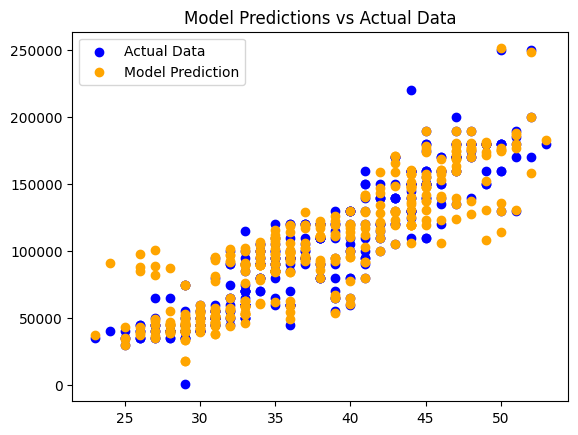

In [154]:
model.eval()
with torch.inference_mode():
    y_pred_scale = model(x_scaled)
    y_pred = torch.tensor(scaler_y.inverse_transform(y_pred_scale.numpy()))
    
plt.scatter(x_tensor[:, 0], y_tensor, label="Actual Data", color="b")
plt.scatter(x_tensor[:,0],y_pred,label="Model Prediction",color="orange")
plt.title("Model Predictions vs Actual Data")
plt.legend()
plt.show()